### Instalamos Librerías

In [2]:
!pip install faiss-cpu pandas sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

### Leemos los datos


In [3]:
import pandas as pd

# Carga tu CSV (reemplaza 'datos.csv' y el nombre de la columna)
df = pd.read_csv("/content/df_final.csv")

# Asegúrate de tener una columna con texto (por ejemplo: "descripcion")
df.head()


,GLU_PRIMERA/FIRST_URG/EMERG,SAT_02_ULTIMA/LAST_URG/EMERG,GLU_ULTIMA/LAST_URG/EMERG,EDAD/AGE,TA_MAX_ULTIMA/LAST_URGEMERG,FC/HR_ULTIMA/LAST_URG/EMERG,PATIENT ID,TA_MAX_PRIMERA/FIRST/EMERG_URG,UCI_DIAS/ICU_DAYS,FC/HR_PRIMERA/FIRST_URG/EMERG,...,PROC_05_DS6,PROC_10,DIA_05_DS6,DIA_07_DS6,POAD_04,DIA_03_DS6,POAD_06,NEO_01,PROC_13,DIA_11_DS6
0,0.0,0.0,0.0,75.0,0.0,0.0,44.0,0.0,1.0,0.0,...,02JA3ZZ,0JCL0ZZ,Z16.24,I07.1,N,T81.41XA,N,8010/39,B2111ZZ,I70.231
1,0.0,97.0,0.0,62.0,160.0,105.0,585.0,160.0,10.0,105.0,...,0BH17EZ,0QU03JZ,R20.1,K59.00,N,B97.29,N,9765/1,3E013NZ,F17.210
2,0.0,95.0,0.0,69.0,141.0,92.0,587.0,141.0,13.2,92.0,...,DP082ZZ,3E03328,B97.29,K37,N,T37.5X5A,N,8130/39,3E0F73Z,G89.3
3,0.0,93.0,0.0,67.0,151.0,84.0,586.0,151.0,13.2,84.0,...,30233N1,3E0F7SF,J96.00,J12.89,S,C78.7,S,8041/39,3E013GC,I16.9
4,0.0,99.0,0.0,72.0,146.0,80.0,588.0,146.0,8.0,80.0,...,8E0ZXY6,B246ZZZ,K29.70,Z22.39,S,B97.29,S,9650/3,8E0ZXY6,D50.9


In [4]:
print(df.isnull().sum())

GLU_PRIMERA/FIRST_URG/EMERG     0
SAT_02_ULTIMA/LAST_URG/EMERG    0
GLU_ULTIMA/LAST_URG/EMERG       0
EDAD/AGE                        0
TA_MAX_ULTIMA/LAST_URGEMERG     0
                               ..
DIA_03_DS6                      0
POAD_06                         0
NEO_01                          0
PROC_13                         0
DIA_11_DS6                      0
Length: 132, dtype: int64


### Imputación por Mediana ( Numéricas) y por Moda ( Categóricas)

In [5]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("df_final.csv")

# Eliminar filas con todos los valores nulos (opcional)
df.dropna(how='all', inplace=True)

# Identificar columnas con valores nulos
missing_info = df.isnull().sum()
missing_info = missing_info[missing_info > 0]

# Recorrer columnas y aplicar imputación
for column in missing_info.index:
    if pd.api.types.is_numeric_dtype(df[column]):
        # Imputar por mediana si es numérico
        median = df[column].median()
        df[column].fillna(median, inplace=True)
    else:
        # Imputar por moda si es categórico
        mode = df[column].mode()
        if not mode.empty:
            df[column].fillna(mode[0], inplace=True)

# Guardar el resultado si lo deseas
df.to_csv("df_final_imputado.csv", index=False)

print("✅ Imputación completa. Archivo guardado como 'df_final_imputado.csv'")


✅ Imputación completa. Archivo guardado como 'df_final_imputado.csv'


### Guardamos en CSV

In [6]:
dff = pd.read_csv("/content/df_final_imputado.csv")
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Columns: 132 entries, GLU_PRIMERA/FIRST_URG/EMERG to DIA_11_DS6
dtypes: float64(20), object(112)
memory usage: 3.9+ MB


### Visualizamos

In [7]:
%%capture
!pip install missingno

<Figure size 2500x1500 with 0 Axes>

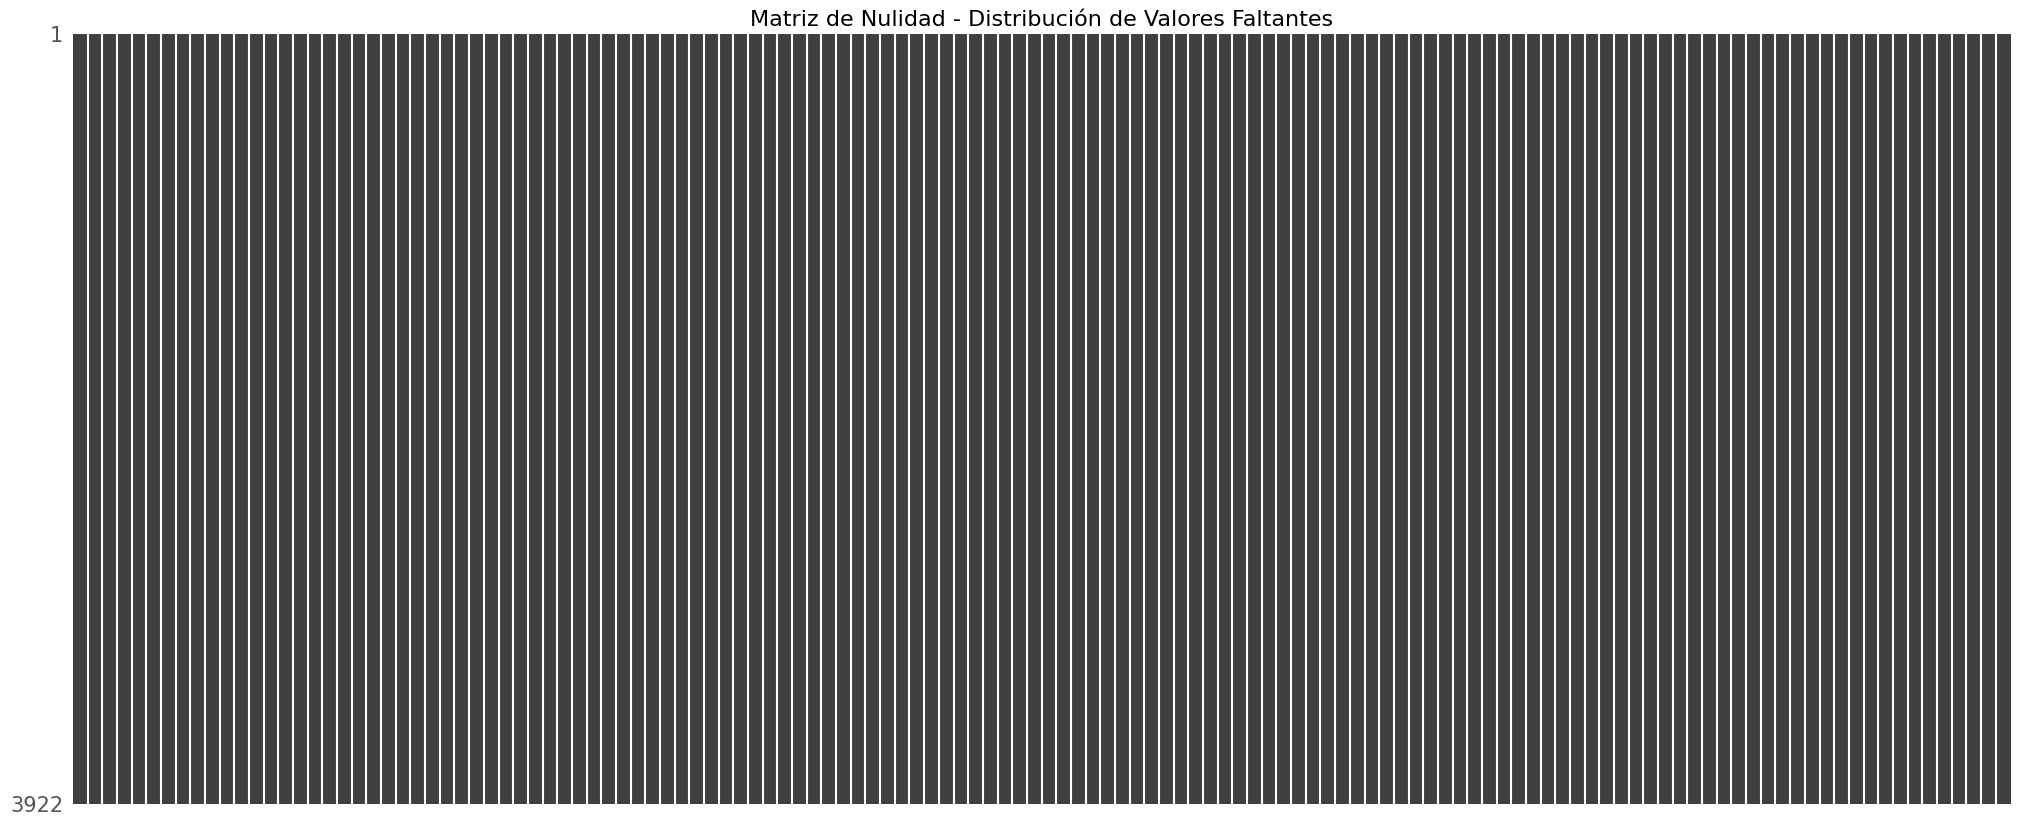


Estadísticas Detalladas de Valores Nulos:
¡No hay valores nulos en tu dataset!


In [8]:
import missingno as msno
import matplotlib.pyplot as plt

# Configurar el estilo visual
plt.style.use('ggplot')

# 1. Matriz de nulidad (visualización general)
plt.figure(figsize=(25, 15))
msno.matrix(dff, sparkline=False, fontsize=12)
plt.title("Matriz de Nulidad - Distribución de Valores Faltantes", fontsize=16)
plt.show()


# 2. Estadísticas detalladas de nulos
print("\n" + "="*50)
print("Estadísticas Detalladas de Valores Nulos:")
print("="*50)
null_stats = dff.isnull().sum().sort_values(ascending=False)
null_stats = null_stats[null_stats > 0]
if len(null_stats) > 0:
    null_percent = (dff.isnull().mean() * 100).round(2)
    null_summary = pd.DataFrame({
        'Columnas': null_stats.index,
        'Nulos': null_stats.values,
        '% Nulos': null_percent[null_stats.index].values
    })
    display(null_summary)
else:
    print("¡No hay valores nulos en tu dataset!")

### Imputamos con KNN Imputer (numericas) y con la Moda ( Categóricas)

In [9]:
import pandas as pd
from sklearn.impute import KNNImputer

# Cargar el archivo CSV
df = pd.read_csv("df_final.csv")

# Separar columnas numéricas y categóricas
df_num = df.select_dtypes(include=["float64", "int64"])
df_cat = df.select_dtypes(exclude=["float64", "int64"])

# Eliminar columnas numéricas completamente vacías (todos sus valores son NaN)
df_num = df_num.dropna(axis=1, how='all')

# Imputación KNN para columnas numéricas
knn_imputer = KNNImputer(n_neighbors=5)
df_num_imputed = pd.DataFrame(knn_imputer.fit_transform(df_num), columns=df_num.columns)

# Imputación por moda para columnas categóricas
for col in df_cat.columns:
    if df_cat[col].isnull().any():
        mode = df_cat[col].mode()
        if not mode.empty:
            df_cat[col].fillna(mode[0], inplace=True)

# Combinar los dos subconjuntos
df_final = pd.concat([df_num_imputed, df_cat.reset_index(drop=True)], axis=1)

# Guardar resultado imputado (opcional)
df_final.to_csv("df_final_imputado_mixto.csv", index=False)

print("✅ Imputación completa: numéricas (KNN), categóricas (moda). Guardado en 'df_final_imputado_mixto.csv'")


✅ Imputación completa: numéricas (KNN), categóricas (moda). Guardado en 'df_final_imputado_mixto.csv'


### Guardamos en CSV

In [10]:
dffm = pd.read_csv("/content/df_final_imputado_mixto.csv")
dffm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Columns: 132 entries, GLU_PRIMERA/FIRST_URG/EMERG to DIA_11_DS6
dtypes: float64(20), object(112)
memory usage: 3.9+ MB


<Figure size 2500x1500 with 0 Axes>

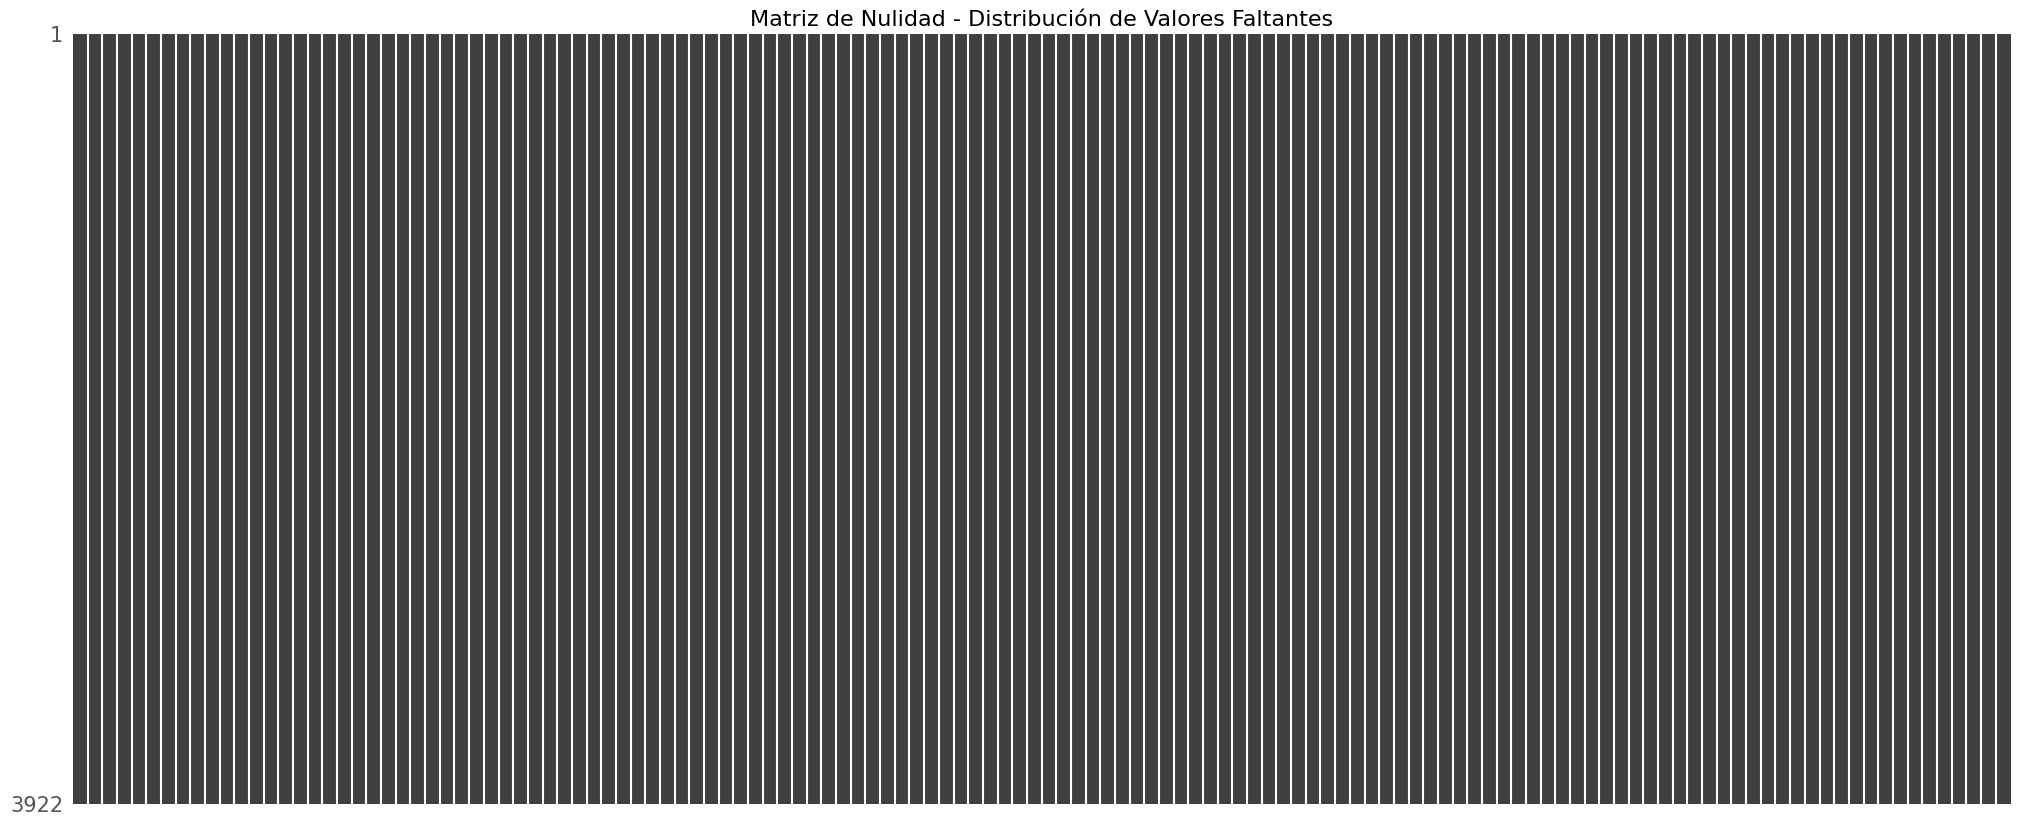


Estadísticas Detalladas de Valores Nulos:
¡No hay valores nulos en tu dataset!


In [11]:
import missingno as msno
import matplotlib.pyplot as plt

# Configurar el estilo visual
plt.style.use('ggplot')

# 1. Matriz de nulidad (visualización general)
plt.figure(figsize=(25, 15))
msno.matrix(dffm, sparkline=False, fontsize=12)
plt.title("Matriz de Nulidad - Distribución de Valores Faltantes", fontsize=16)
plt.show()


# 2. Estadísticas detalladas de nulos
print("\n" + "="*50)
print("Estadísticas Detalladas de Valores Nulos:")
print("="*50)
null_stats = dffm.isnull().sum().sort_values(ascending=False)
null_stats = null_stats[null_stats > 0]
if len(null_stats) > 0:
    null_percent = (dffm.isnull().mean() * 100).round(2)
    null_summary = pd.DataFrame({
        'Columnas': null_stats.index,
        'Nulos': null_stats.values,
        '% Nulos': null_percent[null_stats.index].values
    })
    display(null_summary)
else:
    print("¡No hay valores nulos en tu dataset!")

In [12]:
import pandas as pd

# Carga tu DataFrame (reemplaza 'df_final.csv' con el nombre de tu archivo)
df = pd.read_csv("/content/df_final_imputado_mixto.csv")

# Configura pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Imprime los nombres de las columnas
df.columns.tolist()

# Restaura la configuración por defecto si lo deseas
# pd.reset_option('display.max_columns')

['GLU_PRIMERA/FIRST_URG/EMERG',
 'SAT_02_ULTIMA/LAST_URG/EMERG',
 'GLU_ULTIMA/LAST_URG/EMERG',
 'EDAD/AGE',
 'TA_MAX_ULTIMA/LAST_URGEMERG',
 'FC/HR_ULTIMA/LAST_URG/EMERG',
 'PATIENT ID',
 'TA_MAX_PRIMERA/FIRST/EMERG_URG',
 'UCI_DIAS/ICU_DAYS',
 'FC/HR_PRIMERA/FIRST_URG/EMERG',
 'TA_MIN_ULTIMA/LAST_URG/EMERG',
 'SAT_02_PRIMERA/FIRST_URG/EMERG',
 'TA_MIN_PRIMERA/FIRST_URG/EMERG',
 'DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE',
 'FC/HR_ING/INPAT',
 'TA_MIN_ING/INPAT',
 'TA_MAX_ING/INPAT',
 'SAT_02_ING/INPAT',
 'TEMP_ING/INPAT',
 'GLU/GLY_ING/INPAT',
 'ESPECIALIDAD/DEPARTMENT_URG/EMERG',
 'HORA/TIME_CONSTANT_PRIMERA/FIRST_URG/EMERG',
 'TEMP_ULTIMA/LAST_URG/EMERG',
 'F_ENTRADA_UC/ICU_DATE_IN',
 'HORA/TIME_CONSTANT_ULTIMA/LAST_URG/EMERG',
 'SEXO/SEX',
 'F_INGRESO/ADMISSION_D_ING/INPAT',
 'DIAG ING/INPAT',
 'TEMP_PRIMERA/FIRST_URG/EMERG',
 'F_ALTA/DISCHARGE_DATE_ING',
 'MOTIVO_ALTA/DESTINY_DISCHARGE_ING',
 'F_SALIDA_UCI/ICU_DATE_OUT',
 'DESTINO/DESTINY_URG/EMERG',
 'HORA/TIME_ADMISION/ADMISSION_URG/EM

In [13]:
import pandas as pd

# Cargar el dataset (ejemplo con un archivo CSV)
df = pd.read_csv('/content/df_final_imputado_mixto.csv')

# Lista de columnas a extraer
columnas_deseadas = [
    "PATIENT ID",
    "EDAD/AGE",
    "SEXO/SEX",
    "DIAG ING/INPAT",
    "FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME",
    "UCI_DIAS/ICU_DAYS",
    "TEMP_ING/INPAT",
    "SAT_02_ING/INPAT",
    "RESULTADO/VAL_RESULT",
    "MOTIVO_ALTA/DESTINY_DISCHARGE_ING"
]

# Extraer columnas deseadas
df_filtrado = df[columnas_deseadas]



# Crear columna 'descripcion' combinando info textual + numérica
df_filtrado["descripcion"] = (
    "Edad: " + df["EDAD/AGE"].astype(str) +
    " | Sexo: " + df["SEXO/SEX"].astype(str) +
    " | Diagnóstico: " + df["DIAG ING/INPAT"].astype(str) +
    " | Fármaco: " + df["FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME"].astype(str) +
    " | Días UCI: " + df["UCI_DIAS/ICU_DAYS"].astype(str) +
    " | Temp: " + df["TEMP_ING/INPAT"].astype(str) +
    " | Saturación: " + df["SAT_02_ING/INPAT"].astype(str) +
    " | Resultado: " + df["RESULTADO/VAL_RESULT"].astype(str) +
    " | Alta: " + df["MOTIVO_ALTA/DESTINY_DISCHARGE_ING"].astype(str)
)

df_filtrado.head()

<ipython-input-13-4f3d73a6909a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["descripcion"] = (


,PATIENT ID,EDAD/AGE,SEXO/SEX,DIAG ING/INPAT,FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME,UCI_DIAS/ICU_DAYS,TEMP_ING/INPAT,SAT_02_ING/INPAT,RESULTADO/VAL_RESULT,MOTIVO_ALTA/DESTINY_DISCHARGE_ING,descripcion
0,44.0,75.0,FEMALE,COVID19 - POSITIVO,RELVAR ELLIPTA inh (92+22) mcg/inh,1.0,35.9,0.0,Se detecta,Domicilio,Edad: 75.0 | Sexo: FEMALE | Diagnóstico: COVID...
1,585.0,62.0,FEMALE,COVID19 - POSITIVO,EFEDRINA amp 50 mg/5 mL,10.0,36.2,0.0,13.4,Domicilio,Edad: 62.0 | Sexo: FEMALE | Diagnóstico: COVID...
2,587.0,69.0,MALE,COVID19 - POSITIVO,MORFINA amp 1% 1 mL (10 mg/1 mL),13.2,35.8,0.0,No se detecta,Domicilio,Edad: 69.0 | Sexo: MALE | Diagnóstico: COVID19...
3,586.0,67.0,FEMALE,COVID19 - POSITIVO,ACFOL comp 5 mg,13.2,37.4,0.0,Se detecta,Fallecimiento,Edad: 67.0 | Sexo: FEMALE | Diagnóstico: COVID...
4,588.0,72.0,MALE,COVID19 - POSITIVO,BISOPROLOL comp 5 mg,8.0,37.9,0.0,13.0,Domicilio,Edad: 72.0 | Sexo: MALE | Diagnóstico: COVID19...


### Generamos los vectores


In [14]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")  # Puedes usar otro modelo si lo prefieres

# Asegúrate de que no haya nulos en la columna de texto
df = df_filtrado.dropna(subset=['descripcion'])

# Genera los embeddings
embeddings = model.encode(df["descripcion"].tolist(), convert_to_numpy=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [15]:
import faiss
import numpy as np

# Crear índice FAISS
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(embeddings)

# Hacer una búsqueda ejemplo
consulta = "Mujer de 70 años con infección respiratoria, oxígeno bajo, en tratamiento antibiótico"
embedding_q = model.encode([consulta])
D, I = index.search(np.array(embedding_q), k=5)

# Mostrar resultados
print("Pacientes similares:")
for i in I[0]:
    print(f"- ID: {df.iloc[i]['PATIENT ID']} | {df.iloc[i]['descripcion']}")


Pacientes similares:
- ID: 4117.0 | Edad: 67.0 | Sexo: MALE | Diagnóstico: INFECCION RESPIRATORIA | Fármaco: CLORHEXIDINA sb 0,12% 15 mL | Días UCI: 6.4 | Temp: 36.8 | Saturación: 0.0 | Resultado: 15.2 | Alta: Domicilio
- ID: 3225.0 | Edad: 71.0 | Sexo: FEMALE | Diagnóstico: INFECCION RESPIRATORIA | Fármaco: AMOXICILINA CLAV vial 2 g/200 mg | Días UCI: 13.4 | Temp: 36.6 | Saturación: 0.0 | Resultado: No se detecta | Alta: Domicilio
- ID: 4206.0 | Edad: 85.0 | Sexo: FEMALE | Diagnóstico: INFECCION RESPIRATORIA | Fármaco: ALCOHOL 70Âº 1L | Días UCI: 16.2 | Temp: 36.0 | Saturación: 0.0 | Resultado: 9.2 | Alta: Domicilio
- ID: 3587.0 | Edad: 73.0 | Sexo: MALE | Diagnóstico: INFECCION RESPIRATORIA | Fármaco: GEL PURELL ADVANCE 500 mL | Días UCI: 33.8 | Temp: 36.1 | Saturación: 0.0 | Resultado: 14.3 | Alta: Domicilio
- ID: 3672.0 | Edad: 73.0 | Sexo: MALE | Diagnóstico: INFECCION RESPIRATORIA | Fármaco: GEL PURELL ADVANCE 500 mL | Días UCI: 14.2 | Temp: 37.2 | Saturación: 0.0 | Resultado: 16

Indexamos con FAISS

In [16]:
import faiss
import numpy as np

dimension = embeddings.shape[1]  # Dimensión de los vectores
index = faiss.IndexFlatL2(dimension)  # Usamos L2 (distancia euclídea)
index.add(embeddings)  # Añadir todos los vectores


Buscamos por Similitud

In [25]:
# Texto de consulta
consulta = "ordenador portátil de alto rendimiento"
embedding_consulta = model.encode([consulta])

# Buscar top 5 resultados más similares
distancias, indices = index.search(np.array(embedding_consulta), k=5)

# Mostrar resultados
print("Resultados más similares:")
# Use df_filtrado instead of df and the correct column name 'PATIENT ID'
for i in indices[0]:
    # Check if the column 'PATIENT ID' exists in df_filtrado before accessing
    patient_id = df_filtrado.iloc[i]['PATIENT ID'] if 'PATIENT ID' in df_filtrado.columns else 'N/A'
    description = df_filtrado.iloc[i]['descripcion'] if 'descripcion' in df_filtrado.columns else 'N/A'

    print(f"- ID: {patient_id} | Título: {description}")

Resultados más similares:
- ID: 4120.0 | Título: Edad: 74.0 | Sexo: FEMALE | Diagnóstico: QUISTE SINOVIAL | Fármaco: CLORURO POTASICO amp 2M 10 mL | Días UCI: 10.8 | Temp: 37.2 | Saturación: 0.0 | Resultado: 11.4 | Alta: Domicilio
- ID: 3727.0 | Título: Edad: 58.0 | Sexo: MALE | Diagnóstico: ARTROSCOPIA TERAPEUTICA RODILLA:MENISCO | Fármaco: ALCOHOL 70Âº 1L | Días UCI: 20.0 | Temp: 35.6 | Saturación: 0.0 | Resultado: 13.3 | Alta: Domicilio
- ID: 2770.0 | Título: Edad: 56.0 | Sexo: MALE | Diagnóstico: DEDO MARTILLO | Fármaco: ALCOHOL 70Âº 1L | Días UCI: 17.4 | Temp: 35.7 | Saturación: 0.0 | Resultado: 12.5 | Alta: Domicilio
- ID: 3658.0 | Título: Edad: 44.0 | Sexo: MALE | Diagnóstico: ARTROSCOPIA HOMBRO | Fármaco: OXIGENO PLANTA | Días UCI: 7.6 | Temp: 36.1 | Saturación: 0.0 | Resultado: 11.9 | Alta: Domicilio
- ID: 4020.0 | Título: Edad: 48.0 | Sexo: FEMALE | Diagnóstico: ARTROSCOPIA DIAGNOSTICA RODILLA | Fármaco: CLORURO POTASICO amp 2M 10 mL | Días UCI: 14.2 | Temp: 36.2 | Saturación

guardamos el indice FAISS

In [26]:
faiss.write_index(index, "indice.faiss")


In [27]:
index = faiss.read_index("indice.faiss")


Guardar el resto de Columnas

In [30]:
for i in indices[0]:
    print(f"- ID: {df.iloc[i]['PATIENT ID']} | Título: {df.iloc[i]['descripcion']} | Categoría: {df.iloc[i]['MOTIVO_ALTA/DESTINY_DISCHARGE_ING']}")


- ID: 4120.0 | Título: Edad: 74.0 | Sexo: FEMALE | Diagnóstico: QUISTE SINOVIAL | Fármaco: CLORURO POTASICO amp 2M 10 mL | Días UCI: 10.8 | Temp: 37.2 | Saturación: 0.0 | Resultado: 11.4 | Alta: Domicilio | Categoría: Domicilio
- ID: 3727.0 | Título: Edad: 58.0 | Sexo: MALE | Diagnóstico: ARTROSCOPIA TERAPEUTICA RODILLA:MENISCO | Fármaco: ALCOHOL 70Âº 1L | Días UCI: 20.0 | Temp: 35.6 | Saturación: 0.0 | Resultado: 13.3 | Alta: Domicilio | Categoría: Domicilio
- ID: 2770.0 | Título: Edad: 56.0 | Sexo: MALE | Diagnóstico: DEDO MARTILLO | Fármaco: ALCOHOL 70Âº 1L | Días UCI: 17.4 | Temp: 35.7 | Saturación: 0.0 | Resultado: 12.5 | Alta: Domicilio | Categoría: Domicilio
- ID: 3658.0 | Título: Edad: 44.0 | Sexo: MALE | Diagnóstico: ARTROSCOPIA HOMBRO | Fármaco: OXIGENO PLANTA | Días UCI: 7.6 | Temp: 36.1 | Saturación: 0.0 | Resultado: 11.9 | Alta: Domicilio | Categoría: Domicilio
- ID: 4020.0 | Título: Edad: 48.0 | Sexo: FEMALE | Diagnóstico: ARTROSCOPIA DIAGNOSTICA RODILLA | Fármaco: CLORUR